In [1]:
import pickle
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\'
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'

In [3]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'
save_fig = True

### Load data

In [4]:
csv_data_file_pfdl = results_folder + 'data_pfdl_fixon_1500ms_no_empty_fixation.csv'
with open(csv_data_file_pfdl, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfdl = list(reader)
    
n_spike_trains_pfdl = len(sua_list_pfdl)
print('N spike_trains in PFdl fixON {}'.format(n_spike_trains_pfdl))

N spike_trains in PFdl fixON 33018


In [5]:
csv_data_file_pfp = results_folder + 'data_pfp_fixon_1500ms_no_empty_fixation.csv'
with open(csv_data_file_pfp, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfp = list(reader)

n_spike_trains_pfp = len(sua_list_pfp)
print('N spike_trains in PFp fixON {}'.format(n_spike_trains_pfp))

N spike_trains in PFp fixON 27717


### Get the FR

In [6]:
def get_fr_df(sua_list):
    unit_id_l = []
    spike_count_l = []
    
    for unit in sua_list:
        unit_id_l.append(unit[0])
        spike_count_l.append(len(unit[3:]))
    
    fr_df = pd.DataFrame(np.vstack((unit_id_l, spike_count_l)).T, 
                                             columns=['unit_id', 'spike_count'])
    fr_df['unit_id'] = fr_df['unit_id'].astype(int)
    fr_df['spike_count'] = fr_df['spike_count'].astype(float)
    fr_df['fr_hz'] = fr_df['spike_count'] / 1.5
    fr_df['fr_hz_log10'] = np.log10(fr_df['fr_hz'])
    
    return fr_df

In [7]:
fr_pfdl_df = get_fr_df(sua_list_pfdl)
fr_pfp_df = get_fr_df(sua_list_pfdl)

# unit mean
fr_pfdl_df_mean = fr_pfdl_df.groupby(by='unit_id', as_index=False)[['spike_count', 'fr_hz']].mean()
fr_pfdl_df_mean['fr_hz_log10'] = np.log10(fr_pfdl_df_mean['fr_hz'])
fr_pfdl_df_mean['area'] = 'pfdl'

fr_pfp_df_mean = fr_pfp_df.groupby(by='unit_id', as_index=False)[['spike_count', 'fr_hz']].mean()
fr_pfp_df_mean['fr_hz_log10'] = np.log10(fr_pfp_df_mean['fr_hz'])
fr_pfp_df_mean['area'] = 'pfp'

In [8]:
fr_mean_df = pd.concat([fr_pfdl_df_mean, fr_pfp_df_mean])
fr_mean_df.reset_index(inplace=True, drop=True)
fr_mean_df

,unit_id,spike_count,fr_hz,fr_hz_log10,area
0,0,29.043478,19.362319,1.286957,pfdl
1,1,1.902439,1.268293,0.103219,pfdl
2,2,2.733333,1.822222,0.260601,pfdl
3,3,16.120879,10.747253,1.031297,pfdl
4,4,4.648148,3.098765,0.491189,pfdl
...,...,...,...,...,...
1081,539,4.852941,3.235294,0.509914,pfp
1082,540,3.133333,2.088889,0.319915,pfp
1083,541,26.551402,17.700935,1.247996,pfp
1084,542,3.546512,2.364341,0.373710,pfp


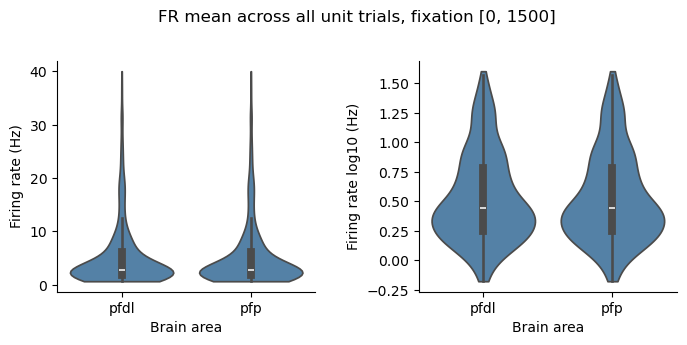

In [9]:
# plot with grouping per animal

fig, axes = plt.subplots(1, 2, figsize=(8,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='area', y='fr_hz', data=fr_mean_df, cut=0, density_norm='width', color='steelblue')
sns.violinplot(ax=axes[1], x='area', y='fr_hz_log10', data=fr_mean_df, cut=0, density_norm='width', color='steelblue')

axes[0].set_ylabel('Firing rate (Hz)')
axes[1].set_ylabel('Firing rate log10 (Hz)')

for ax in axes.flat:
    ax.set_xlabel('Brain area')

fig.suptitle('FR mean across all unit trials, fixation [0, 1500]', y=1.05)

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'fr_fixation_no_empty_1500.png' , bbox_inches='tight')
    plt.savefig(fig_folder + 'fr_fixation_no_empty_1500.svg' , bbox_inches='tight')